In [1]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Set your Kaggle API credentials (make sure to upload your kaggle.json file to your notebook)
# os.environ["KAGGLE_USERNAME"] = "ajfunari"
# os.environ["KAGGLE_KEY"] = "cb66eed558fe1d91db565e0d279b2fdb"

# # Create a Kaggle API object
api = KaggleApi()
api.authenticate()

# # Specify the dataset you want to download
dataset_name = "tawsifurrahman/covid19-radiography-database"

# # Set the destination folder for the downloaded dataset
current_directory = os.getcwd()
download_path = "/input"
path = current_directory + download_path
print(path)

# # Download the dataset
api.dataset_download_files(dataset_name, path=path, unzip=True)  # 800 MB

c:\Users\flyin\OneDrive - Indiana University\Fall23\Intro to Intelligent Systems\GitHub\Xray_Classification\AJ Test Scripts/input


In [73]:
from torchvision import transforms
from torchvision.datasets import ImageFolder

# current working directory
current_directory = os.getcwd()

# image directory
all_images = '/input/COVID-19_Radiography_Dataset'
# covid_images = '/input/COVID-19_Radiography_Dataset/COVID'  # 3,616
# normal_images = '/input/COVID-19_Radiography_Dataset/Normal'  # 10,192

# Set the paths to your data folders
all_path = current_directory + all_images
# covid_path = current_directory + covid_images
# normal_path = current_directory + normal_images

# print(covid_path)
# print(normal_path)

'''
Reshape images to (3,224, 224)
Normalize images
'''
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
'''
ImageFolder will store all images in COVID folder and Normal folder into one dataset. Target 0 
is assigned to COVID images. Target 1 is assigned to Normal images.
- torch.Size([3, 224, 224])
'''
# Create datasets
all_images = ImageFolder(all_path, transform=transform)  # 10,192 + 3,616 = 13,808
for i in range(len(all_images)):
    print(all_images[i][0].shape)
    break
# normal_dataset = ImageFolder(normal_path, transform=transform)
# covid_dataset = ImageFolder(covid_path, transform=transform)
     
# print(normal_dataset[0])
# print(covid_dataset[0])

torch.Size([3, 224, 224])


In [74]:
from torch.utils.data import ConcatDataset, Subset, random_split, DataLoader

'''
ConcatDataset returns two tensors for each index. The first tensor is the
data, the second tensor is the target. All targets are 0, thus I created
a new labels list with tensors 0 and 1
'''
# Concatenate datasets and create labels (0 for normal, 1 for COVID)
# datasets = ConcatDataset([normal_dataset, covid_dataset])
# labels = torch.tensor([0] * len(normal_dataset) + [1] * len(covid_dataset))

# Shuffle the data
# indices = torch.randperm(len(datasets))  # random permutation indices
# shuffled_dataset = Subset(datasets, indices)
# shuffled_labels = labels[indices]

'''
The random_split function will use the same random permutation indices
for both training and testing datasets, so the alignment is preserved
'''

# Split the data into training and testing sets
train_size = int(0.8 * len(all_images))
test_size = len(all_images) - train_size
train_dataset, test_dataset = random_split(all_images, [train_size, test_size])
# train_labels, test_labels = shuffled_labels[:train_size], shuffled_labels[train_size:]

In [84]:
# Hyper parameters
num_epochs = 1
img_channels = 3
num_classes = 2
batch_size = 40
learning_rate = 0.01

# Create DataLoader for training and testing
batch_size = 60
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# print(len(train_loader))

185


In [85]:
import torch
import torch.nn as nn
from ResNet import block, ResNet

# ResNet 50 Layers
model = ResNet(block, [3,4,6,3], img_channels, num_classes)

# Loss
criterion = nn.CrossEntropyLoss()
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Store training loss
training_loss = []

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        print(i)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 5 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            training_loss.append(loss.item())

0
1
2
3
4
Epoch [1/1], Step [5/185], Loss: 1.3627
5
6
7
8
9
Epoch [1/1], Step [10/185], Loss: 0.7145
10
11
12
13
14
Epoch [1/1], Step [15/185], Loss: 2.0522
15
16
17
18
19
Epoch [1/1], Step [20/185], Loss: 0.4681
20
21
22
23
24
Epoch [1/1], Step [25/185], Loss: 0.5129
25
26
27
28
29
Epoch [1/1], Step [30/185], Loss: 0.5024
30
31
32
33
34
Epoch [1/1], Step [35/185], Loss: 0.5990
35
36
37
38
39
Epoch [1/1], Step [40/185], Loss: 0.4819
40
41
42
43
44
Epoch [1/1], Step [45/185], Loss: 0.4022
45
46
47
48
49
Epoch [1/1], Step [50/185], Loss: 0.5386
50
51
52
53
54
Epoch [1/1], Step [55/185], Loss: 0.5657
55
56
57
58
59
Epoch [1/1], Step [60/185], Loss: 0.5333
60
61
62
63
64
Epoch [1/1], Step [65/185], Loss: 0.7426
65
66
67
68
69
Epoch [1/1], Step [70/185], Loss: 0.5869
70
71
72
73
74
Epoch [1/1], Step [75/185], Loss: 0.3292
75
76
77
78
79
Epoch [1/1], Step [80/185], Loss: 0.5618
80
81
82
83
84
Epoch [1/1], Step [85/185], Loss: 0.4765
85
86
87
88
89
Epoch [1/1], Step [90/185], Loss: 0.4925
90


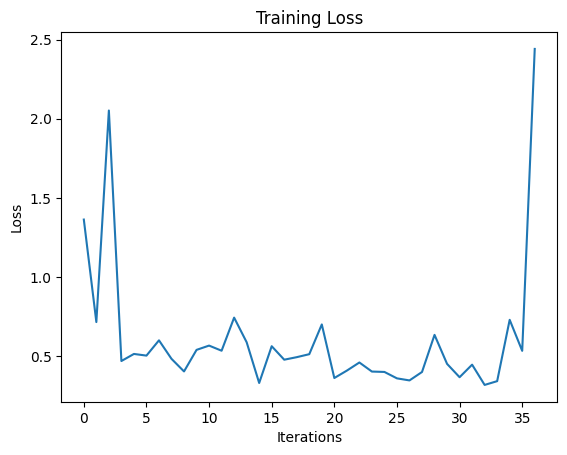

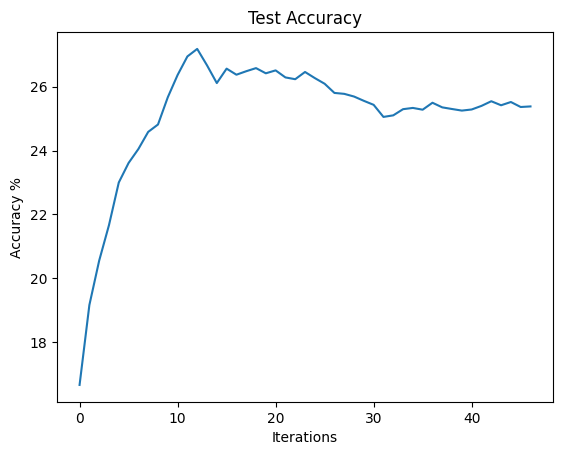

In [87]:
import matplotlib.pyplot as plt

plt.figure()
plt.title("Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(training_loss)
plt.show()

# Store test accuracy
test_accuracy = []

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)  # send batch of images through CNN
        # Tensor.data = tensor
        _, predicted = torch.max(outputs.data, 1)  # extract highest predicted value
        # Tensor.size(): torch.Size, Tensor.size(0): int
        total += labels.size(0)
        # Tensor.item(): number
        correct += (predicted == labels).sum().item()
        # Store test accuracy per minibatch (200 batches w/ 50 images)
        accuracy = (correct/total)*100
        test_accuracy.append(accuracy)
    print(f"Test accuracy: {(correct/total)*100}%")

# Plot test accuracy
plt.figure()
plt.title("Test Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy %")
plt.plot(test_accuracy)
plt.show()

In [ ]:
import torch
import torch.nn as nn
from AlexNet import AlexNet

# ResNet 50 Layers
model = ResNet(block, [3,4,6,3], img_channels, num_classes)

# Loss
criterion = nn.CrossEntropyLoss()
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Store training loss
training_loss = []

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        print(i)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 5 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            training_loss.append(loss.item())